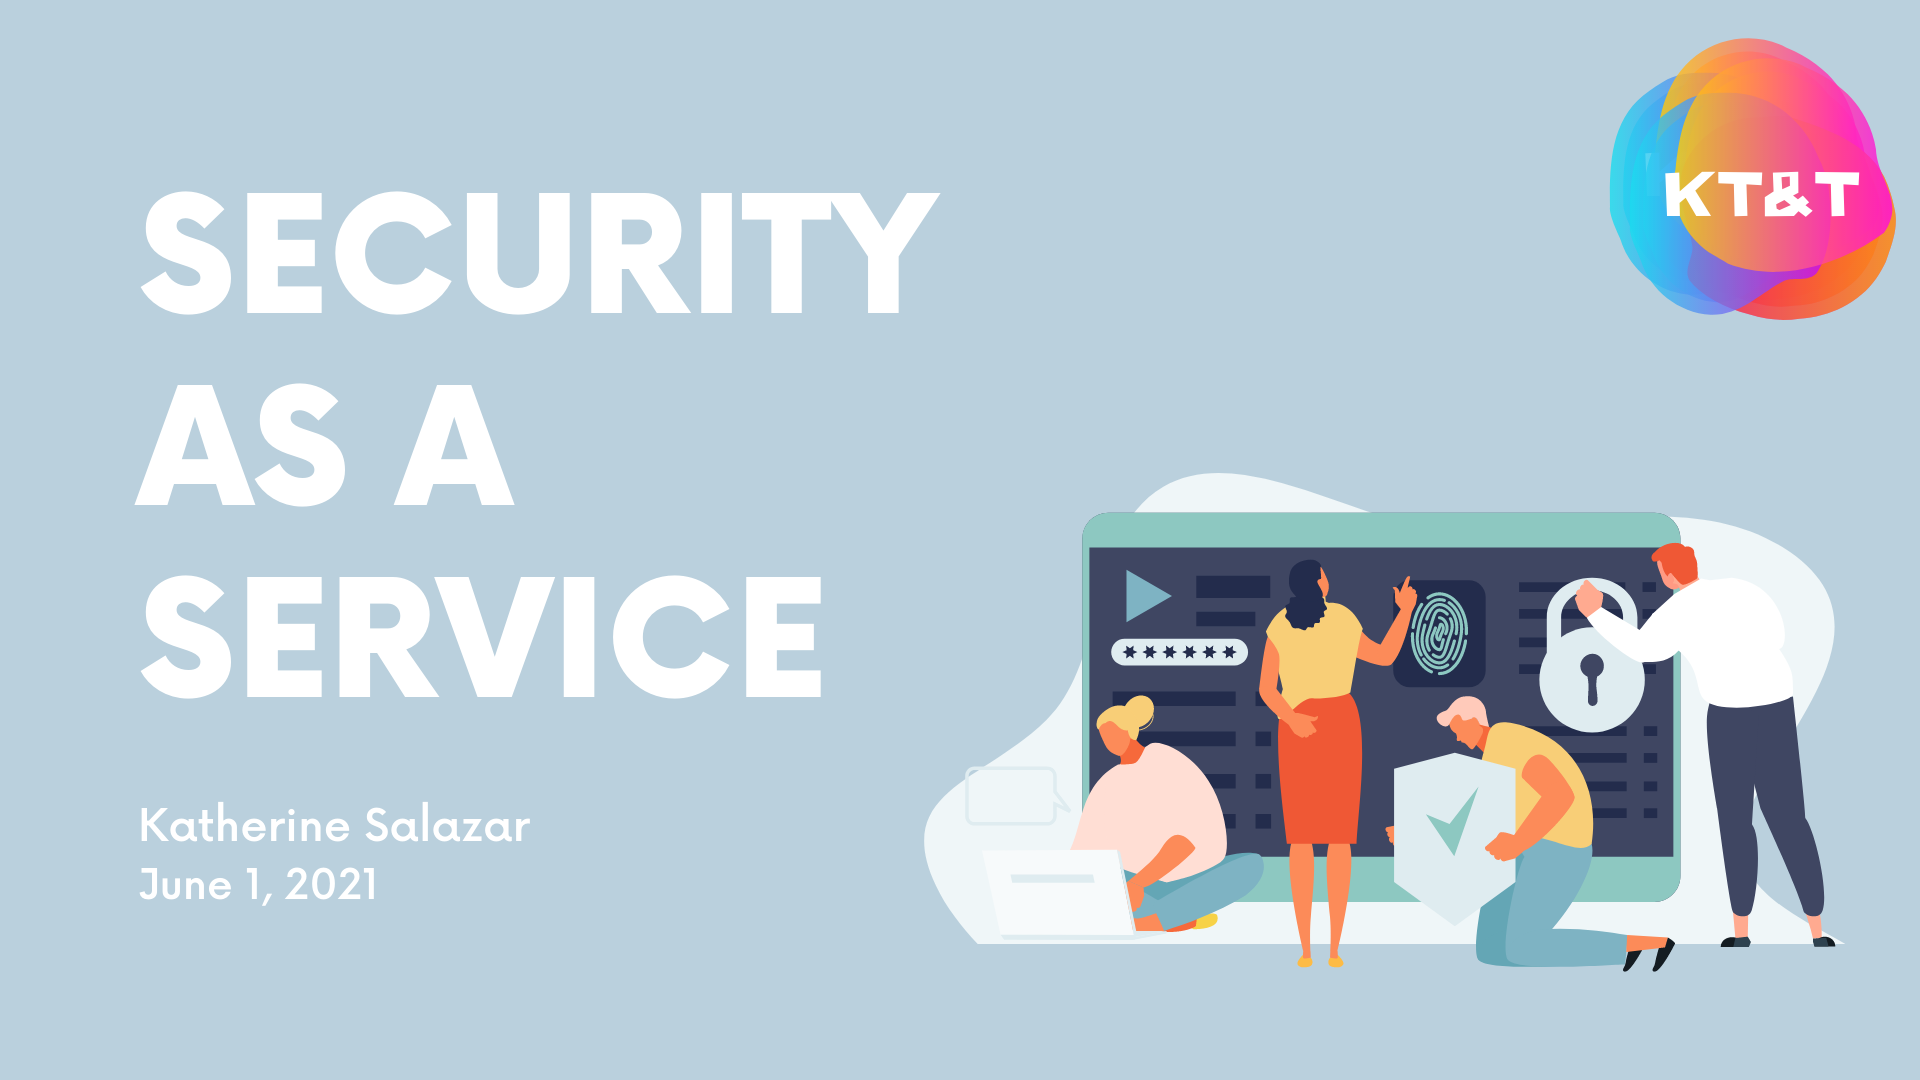

In [ ]:
# Insert executive summary silde here 

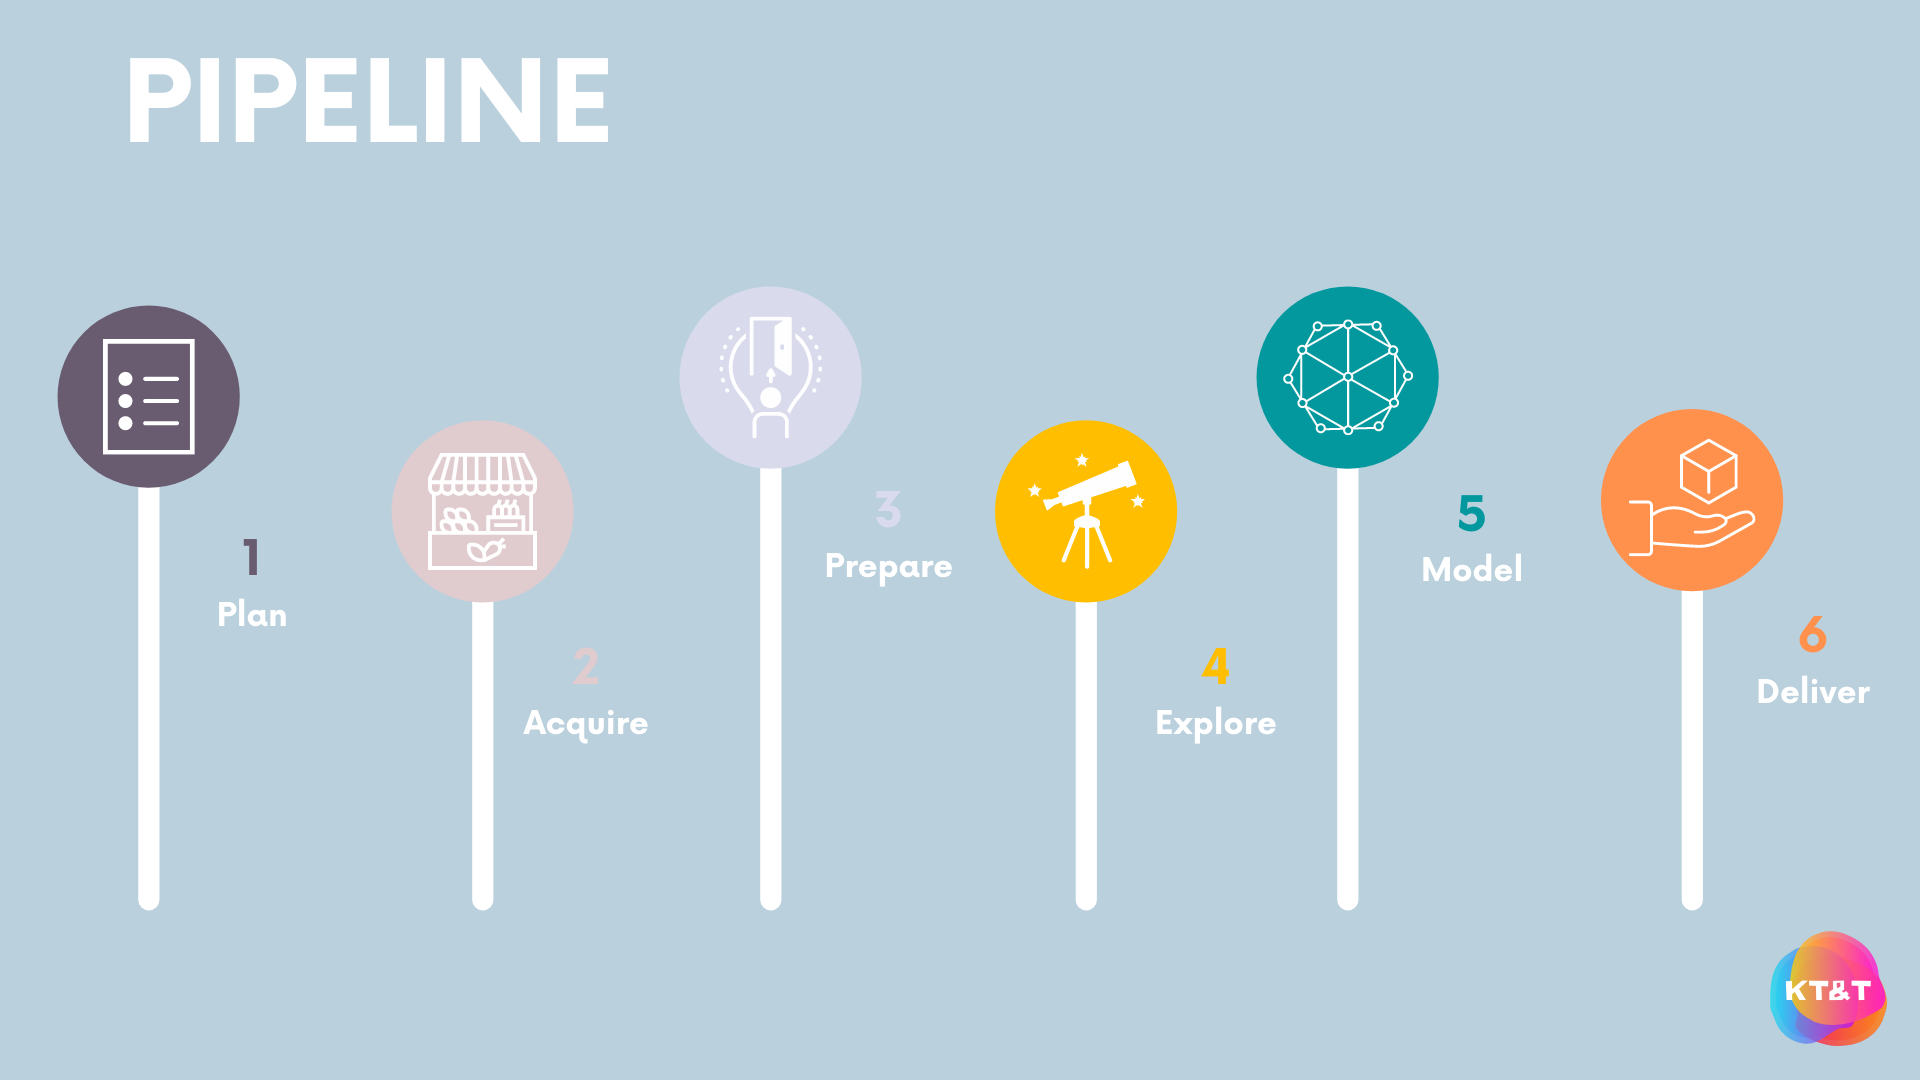

In [1]:
# set up our environment
import os
import acquire
import prepare
import explore
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.feature_selection as feat_select
import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
print('environment is ready')

environment is ready


# Plan
- Refer to trello kanban board for planning overview: https://trello.com/b/xqrSsjwa/telco-classification-project
- Utilized agile program management methodology 

# Acquire

In [2]:
# from the imported acquire file, call the 'read_telco_data' function 
from env import host, user, password
import acquire
df = acquire.read_telco_data()

In [3]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,Mailed check,DSL
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,Credit card (automatic),DSL
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,Bank transfer (automatic),DSL
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,Credit card (automatic),DSL
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,Bank transfer (automatic),DSL


In [4]:
df.shape

(7043, 24)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

<div class="alert alert-block alert-info"> <b>Note:</b> Our current df shape is: (7043, 24). We have a telco_churn dataframe, let us move on to prepare.</div>


# Prepare

In [7]:
# from the imported acquire file, call the 'read_telco_data' function
# shape is (7043, 24)
import prepare
df = acquire.read_telco_data()
df.shape

(7043, 24)

**Data Prepare**

In [8]:
# from the imported prepare file, call the helper functions to prepare data 
# prep_telco function
# shape = (7043,24)
prepare.prep_telco(df)
# create_tenure function: creating tenure year column, 
# shape = (7043,25)
prepare.create_tenure_year(df)
# is_churn function: Function used to create a new column for churn
prepare.is_churn(df)
# encode_all function: encodes columns into integers
# shape = (7043,26)
prepare.encode_all(df)
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.prep_telco_model(df)
df.shape

(7043, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [31]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,90.45,5957.90,No,Two year,Mailed check,DSL,5,False
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,No,No,45.20,2460.55,No,Two year,Credit card (automatic),DSL,4,False
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,No,No,45.05,2560.10,No,Two year,Bank transfer (automatic),DSL,4,False
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,No,Yes,39.40,825.40,No,Two year,Credit card (automatic),DSL,1,False
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,85.15,6316.20,No,Two year,Bank transfer (automatic),DSL,6,False


<div class="alert alert-block alert-info"><b>Note:</b> Our prepare data now has 26 columns from the original dataset of 24 columns. Within our prepare file we added the 'create_tenure_year' and 'is_churn' columns along wtih some data cleaning prep handling missing values and data integrity issues!</div>

**Data Train Test Split**

In [10]:
# Split data into Train, Validate, Test
# Target is churn
target = 'is_churn'
# categorical variables:
cat_vars = 'is_churn', 'internet_service_type_id','tenure', 'online_security','online_backup', 'device_protection', 'tech_support'
num_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]] 

In [11]:
# Random state is set & data is split within the function 
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

prepare


In [12]:
# Random state is set & data is split within the function 
prepare.test_train_split(df, stratify_value = 'churn')
print('prepare')

prepare


In [13]:
train, validate, test = prepare.train_validate_test_split(df, target, seed =789)
train.head
print('prepare')

prepare


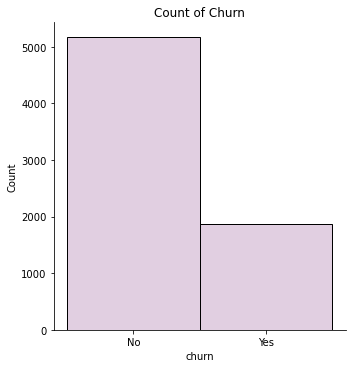

In [14]:
# Count of Churn
sns.displot(df, x="churn", color = 'thistle').set(title='Count of Churn')
plt.title= "Count of Churn"
plt.show()

In [15]:
# numeric columns in the dataset
num_cols

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'tenure_years', 'is_churn'],
      dtype='object')

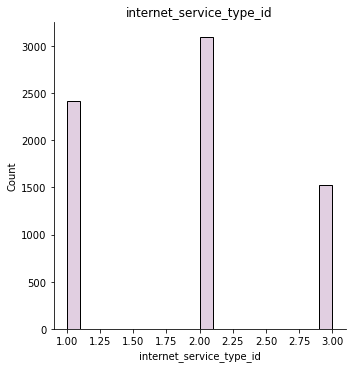

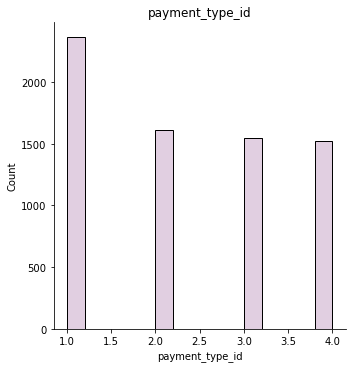

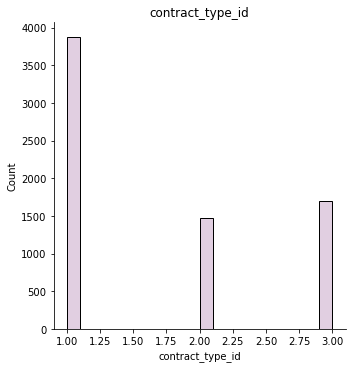

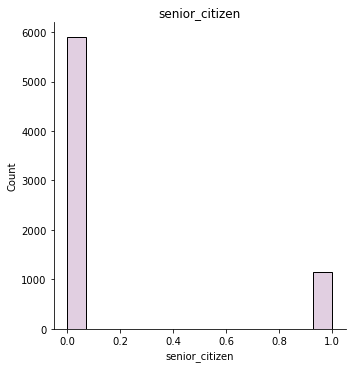

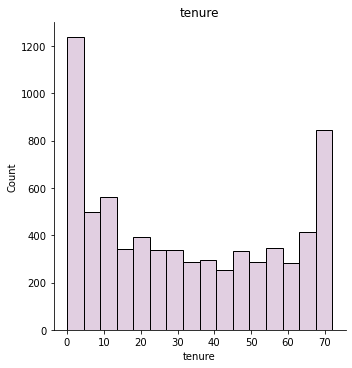

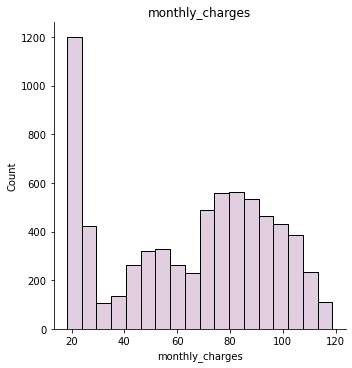

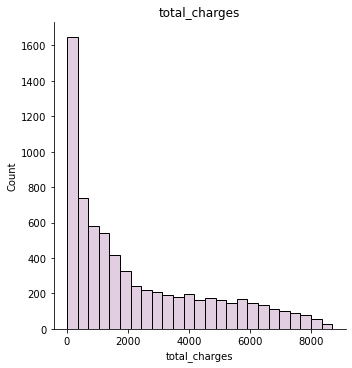

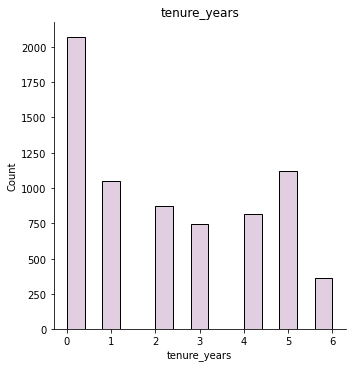

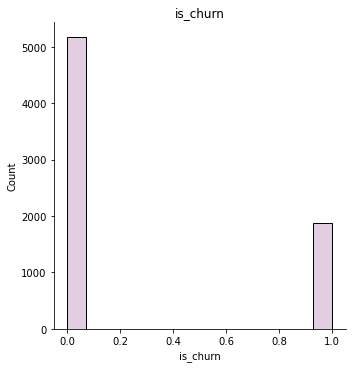

In [16]:
# Individual variable distributions are plotted for the numeric columns
for col in num_cols:
    sns.displot(df, x=df[col], color = 'thistle').set(title=col)
    plt.title= "col"
    plt.show()

In [17]:
# object columns in the dataset
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'payment_type',
       'internet_service_type'],
      dtype='object')

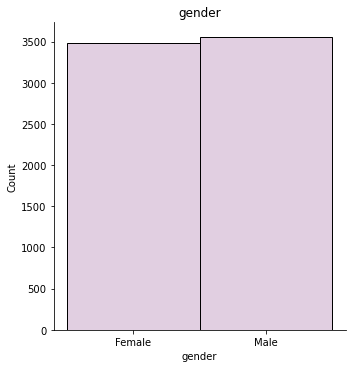

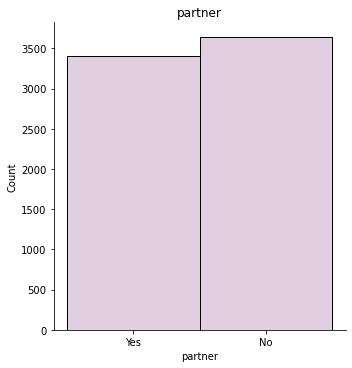

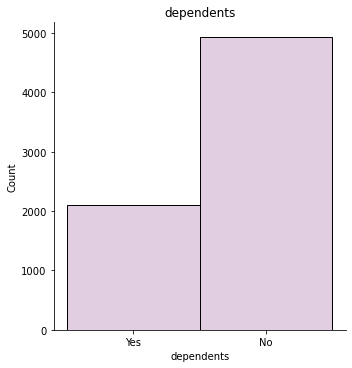

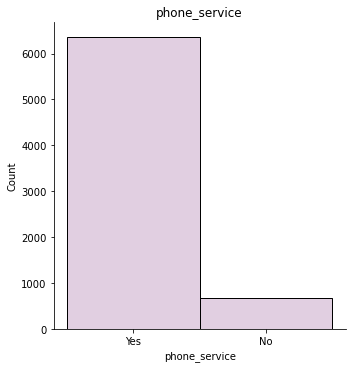

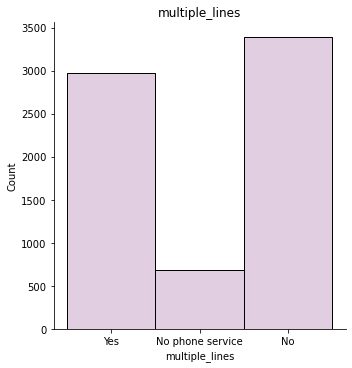

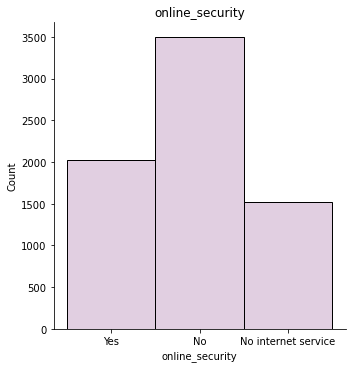

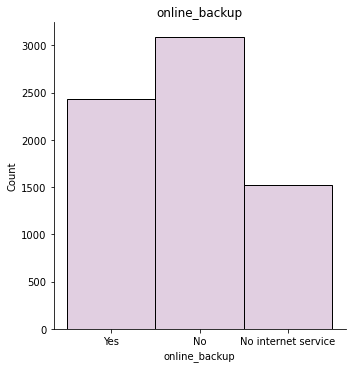

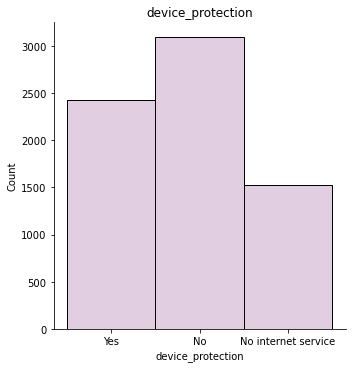

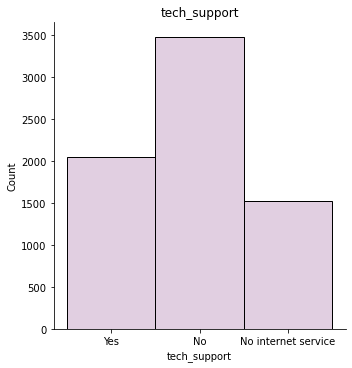

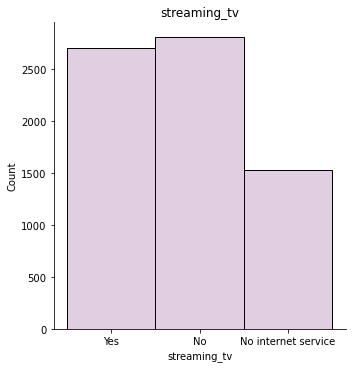

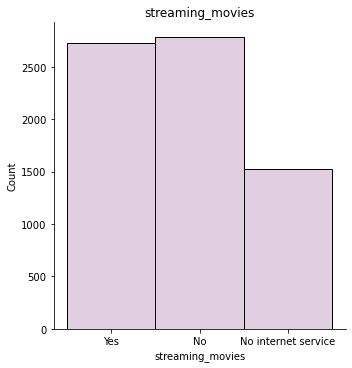

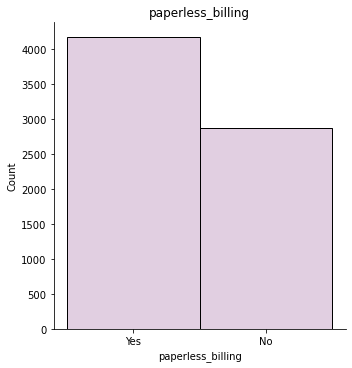

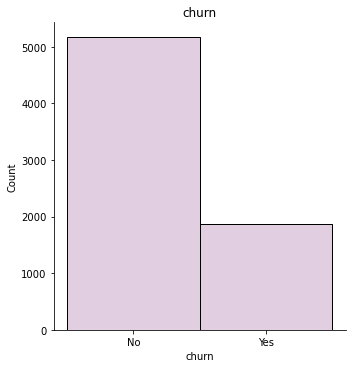

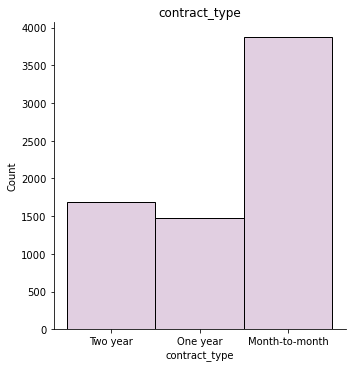

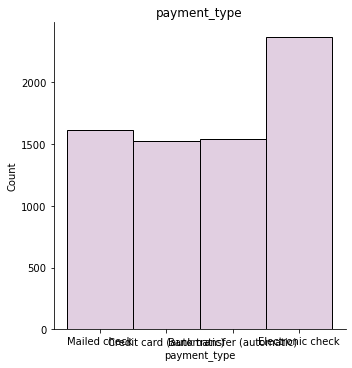

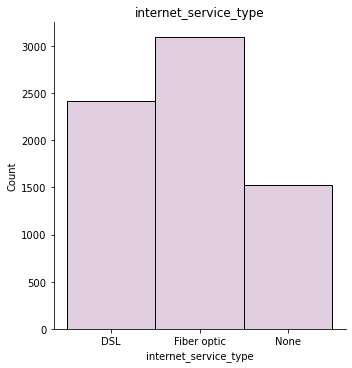

In [18]:
# Individual variable distributions are plotted for the object columns 
# skipping over customer as unique identifyers not needed to be plotted
for col in obj_cols:    
    if col == 'customer_id':
        continue
    sns.displot(df, x=df[col], color = 'thistle').set(title=col)
    plt.title= "col"
    plt.show()

**Takeaways and action items from Acquire**

<code style="background:yellow;color:black">Lots of data points (25 not including customer ID), thus need to narrow in within explore to understand how we can prevent churn.</code>

# Explore

**Hypothesis**
- $H0$: There is no relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

- $Ha$: There is a relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

# Statistical Tests:
- Univariate Stats
- Bivariate Stats
- Multivariate Stats & Analysis 

<div class="alert alert-block alert-info"><b>Note:</b> We will only focus on the following features within explore: internet_service_type_id, online_security, online_backup, device_protection, tech_support. Version 1 Explore notes can be referred to in 'explore_v1.ipynb' within this repository.</div>

**Restart kernel, clear all outputs and run from here if having str errors**

In [ ]:
# Reset all variables NOW.
%reset -f

In [ ]:
# import of the explore file
import acquire
import prepare
import explore
print('explore ready')

In [ ]:
# acquire functions
# ACQUIRE the telco_churn data from our mySQL database
# from the acquire file, pull the csv file 
# shape = (7043,24)
df = acquire.read_telco_data()
df.shape

In [ ]:
# prepare functions:
prepare.prep_telco(df)
prepare.create_tenure_year(df)
prepare.is_churn(df)
prepare.encode_all(df)
prepare.security_features(df)
prepare.backup_features(df)
prepare.device_protection_features(df)
prepare.encode_feature_columns(df)
df.shape

In [ ]:
import prepare

In [ ]:
target = 'is_churn'

In [ ]:
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

In [ ]:
train, validate, test = prepare.train_validate_test_split(df, target)
train.head
print('prepare')

In [ ]:
print(train.shape, validate.shape, test.shape)

In [ ]:
cat_vars = 'is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support'
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

**Univariate Stats**

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

**Bivariate Stats** 

**Restart kernel, clear all outputs and run from here if having str errors**

In [ ]:
# Reset all variables NOW.
%reset -f

In [ ]:
# import of the explore file
import acquire
import prepare
import explore
print('explore ready')

In [ ]:
# acquire functions
# ACQUIRE the telco_churn data from our mySQL database
# from the acquire file, pull the csv file 
# shape = (7043,24)
df = acquire.read_telco_data()
df.shape

In [ ]:
# prepare functions:
prepare.prep_telco(df)
prepare.create_tenure_year(df)
prepare.is_churn(df)
prepare.encode_all(df)
prepare.security_features(df)
prepare.backup_features(df)
prepare.device_protection_features(df)
prepare.encode_feature_columns(df)
df.shape

In [ ]:
target = 'is_churn'

In [ ]:
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

In [ ]:
train, validate, test = prepare.train_validate_test_split(df, target)
train.head
print('prepare')

In [ ]:
print(train.shape, validate.shape, test.shape)

In [ ]:
cat_vars = 'is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support'
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

In [ ]:
cat_vars = cat_vars[1:]
cat_vars

In [ ]:
explore.explore_bivariate(train, 'is_churn', cat_vars, quant_vars)

**Multivariate Stats & Analysis**

In [ ]:
# Reset all variables NOW.
%reset -f

In [ ]:
# import of the explore file
import acquire
import prepare
import explore
print('explore ready')

In [ ]:
# acquire functions
# ACQUIRE the telco_churn data from our mySQL database
# from the acquire file, pull the csv file 
# shape = (7043,24)
df = acquire.read_telco_data()
df.shape

In [ ]:
# prepare functions:
prepare.prep_telco(df)
prepare.create_tenure_year(df)
prepare.is_churn(df)
prepare.encode_all(df)
prepare.security_features(df)
prepare.backup_features(df)
prepare.device_protection_features(df)
prepare.encode_feature_columns(df)
df.shape

In [ ]:
target = 'is_churn'

In [ ]:
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

In [ ]:
train, validate, test = prepare.train_validate_test_split(df, target)
train.head
print('prepare')

In [ ]:
print(train.shape, validate.shape, test.shape)

In [ ]:
cat_vars = 'is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support'
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

In [ ]:
explore.explore_multivariate(train, target, cat_vars, quant_vars)

# Modeling

**Hypothesis**
- $H0$: There is no relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

- $Ha$: There is a relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

    - **True Positive**: Predict there is a relationship and there is a relationship

    - **True Negative**:Predict there is no relationship and there is not relationship

    - **False Positive**: Predict there is a relationship and there is no relationship

    - **False Negative**: Predict there is no relationship and there is a relationship

In [19]:
# split data for the model
train, test = train_test_split(df, test_size=.2, random_state=789)
train, validate = train_test_split(train, test_size=.3, random_state=789)

In [20]:
# specify columns to use for the model with focus on risk and security
X_col= ['internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support']
y_col= 'is_churn'

In [21]:
# shapes size
train.shape, validate.shape, test.shape

((3943, 26), (1691, 26), (1409, 26))

In [22]:
# specify train, validate, test
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]

In [23]:
# shape of train set
X_train.shape, y_train.shape

((3943, 5), (3943,))

In [24]:
#create baseline
train['baseline'] = 0

In [25]:
#obtain accuracy score for baseline
accuracy_score(train.is_churn, train.baseline)

0.7423281765153437

<code style="background:yellow;color:black">Baseline accuracy for no one churning is 74% when model is focused on internet service risk and security.</code>

# Model I: Random Forest

In [32]:
# Features to put into model
X_cols = ['internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support']

# Target
y_col = 'tenure_years'

In [33]:
import prepare

In [34]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.X_train_function(X_cols, y_col, train, validate, test)

In [35]:
# make model and fit to train
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

ValueError: could not convert string to float: 'Yes'